# CS640 Homework 2: Neural Network

In this assignment, you will

1. derive both forward and backward propagation,
2. implement a neural network from scratch, and
3. run experiments with your model.

### Collaboration
You are allowed to work in a team of at most **three** on the coding part(**Q2**), but you must run the experiments and answer written questions independently.

## Instructions

### General Instructions
In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Most of the written questions are followed up a cell for you enter your answers. Please enter your answers in a new line below the **Answer** mark. If you do not see such cell, please insert one by yourself. Your answers and the questions should **not** be in the same cell.

### Instructions on Math
Some questions require you to enter math expressions. To enter your solutions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. The [OEIS website](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) can also be helpful.

Alternatively, you can scan your work from paper and insert the image(s) in a text cell.

## Submission
Once you are ready, save the note book as PDF file (File -> Print -> Save as PDF) and submit via Gradescope.

## Q0: Name(s)

Please write your name in the next cell. If you are collaborating with someone, please list their names as well.

**Answer**

Abdelazim Lokma

## Q1: Written Problems

Consider a simple neural network with three layers: an input layer, a hidden layer, and an output layer.

Let $w^{(1)}$ and $w^{(2)}$ be the layers' weight matrices and let $b^{(1)}$ and $b^{(2)}$ be their biases. For convention, suppose that $w_{ij}$ is the weight between the $i$th node in the previous layer and the $j$th node in the current one.

Additionally, the activation function for both layers is the sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$. Let $z^{(1)}$ and $z^{(2)}$ be the outputs of the two layers before activation, and let $a^{(1)} = \sigma(z^{(1)})$ and $a^{(2)} = \sigma(z^{(2)})$.

Lastly, we choose the L2 loss $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$ as the loss function.


### Q1.1: Forward Pass
Suppose that

$w^{(1)} = \begin{bmatrix}0.4 & 0.6 & 0.2 \\ 0.3 & 0.9 & 0.5\end{bmatrix}$,
 $b^{(1)} = [1, 1, 1]$; and

$w^{(2)} = \begin{bmatrix}0.2 \\ 0.2 \\ 0.8\end{bmatrix}$, $b^{(2)} = [0.5]$.

If the input is $a^{(0)} = \begin{bmatrix}1 \\ 1\end{bmatrix}$, what is the network output? Show your calculation steps and round your answer to 4 decimals.

Please find my solution coded below:

In [514]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a_0 = np.array([[1], [1]])

w_1 = np.array([[0.4, 0.6, 0.2], [0.3, 0.9, 0.5]])
b_1_t = np.ones((3, 1))

w_2 = np.array([[0.2], [0.2], [0.8]])
b_2_t = np.array([0.5])

# calculate z_1 = 
z_1 = w_1.T @ a_0 + b_1_t

#calculate a_1
a_1 = sigmoid(z_1)

# # calculate z_2
z_2 = w_2.T @ a_1 + b_2_t

#calculate a_2
a_2 = sigmoid(z_2)

print(np.round(a_2, 4))


[[0.8221]]


### Q1.2: Backward Propagation

Use the chain rule to derive the expressions of the following gradients:
1. $\frac{\partial L}{\partial w^{(2)}}$ and $\frac{\partial L}{\partial b^{(2)}}$
2. $\frac{\partial L}{\partial w^{(1)}}$ and $\frac{\partial L}{\partial b^{(1)}}$

Your final answers should only include the variables appeared in the question.

*Hint #1*: Begin by writing down the chain of partial derivatives, and then plug in predefined variables.

*Hint #2*: While plugging in predefined variables, be careful about the dimensions and orientation. You can first write down the expressions in the element level and then figure out the matrix form.

*Hint #3*: The derivative of $\sigma(x)$ is $\sigma(x)(1 - \sigma(x))$.

*Hint #4*: The LaTex code for dot product and element-wise product: $\cdot$ and $\odot$.

**[Answer]**

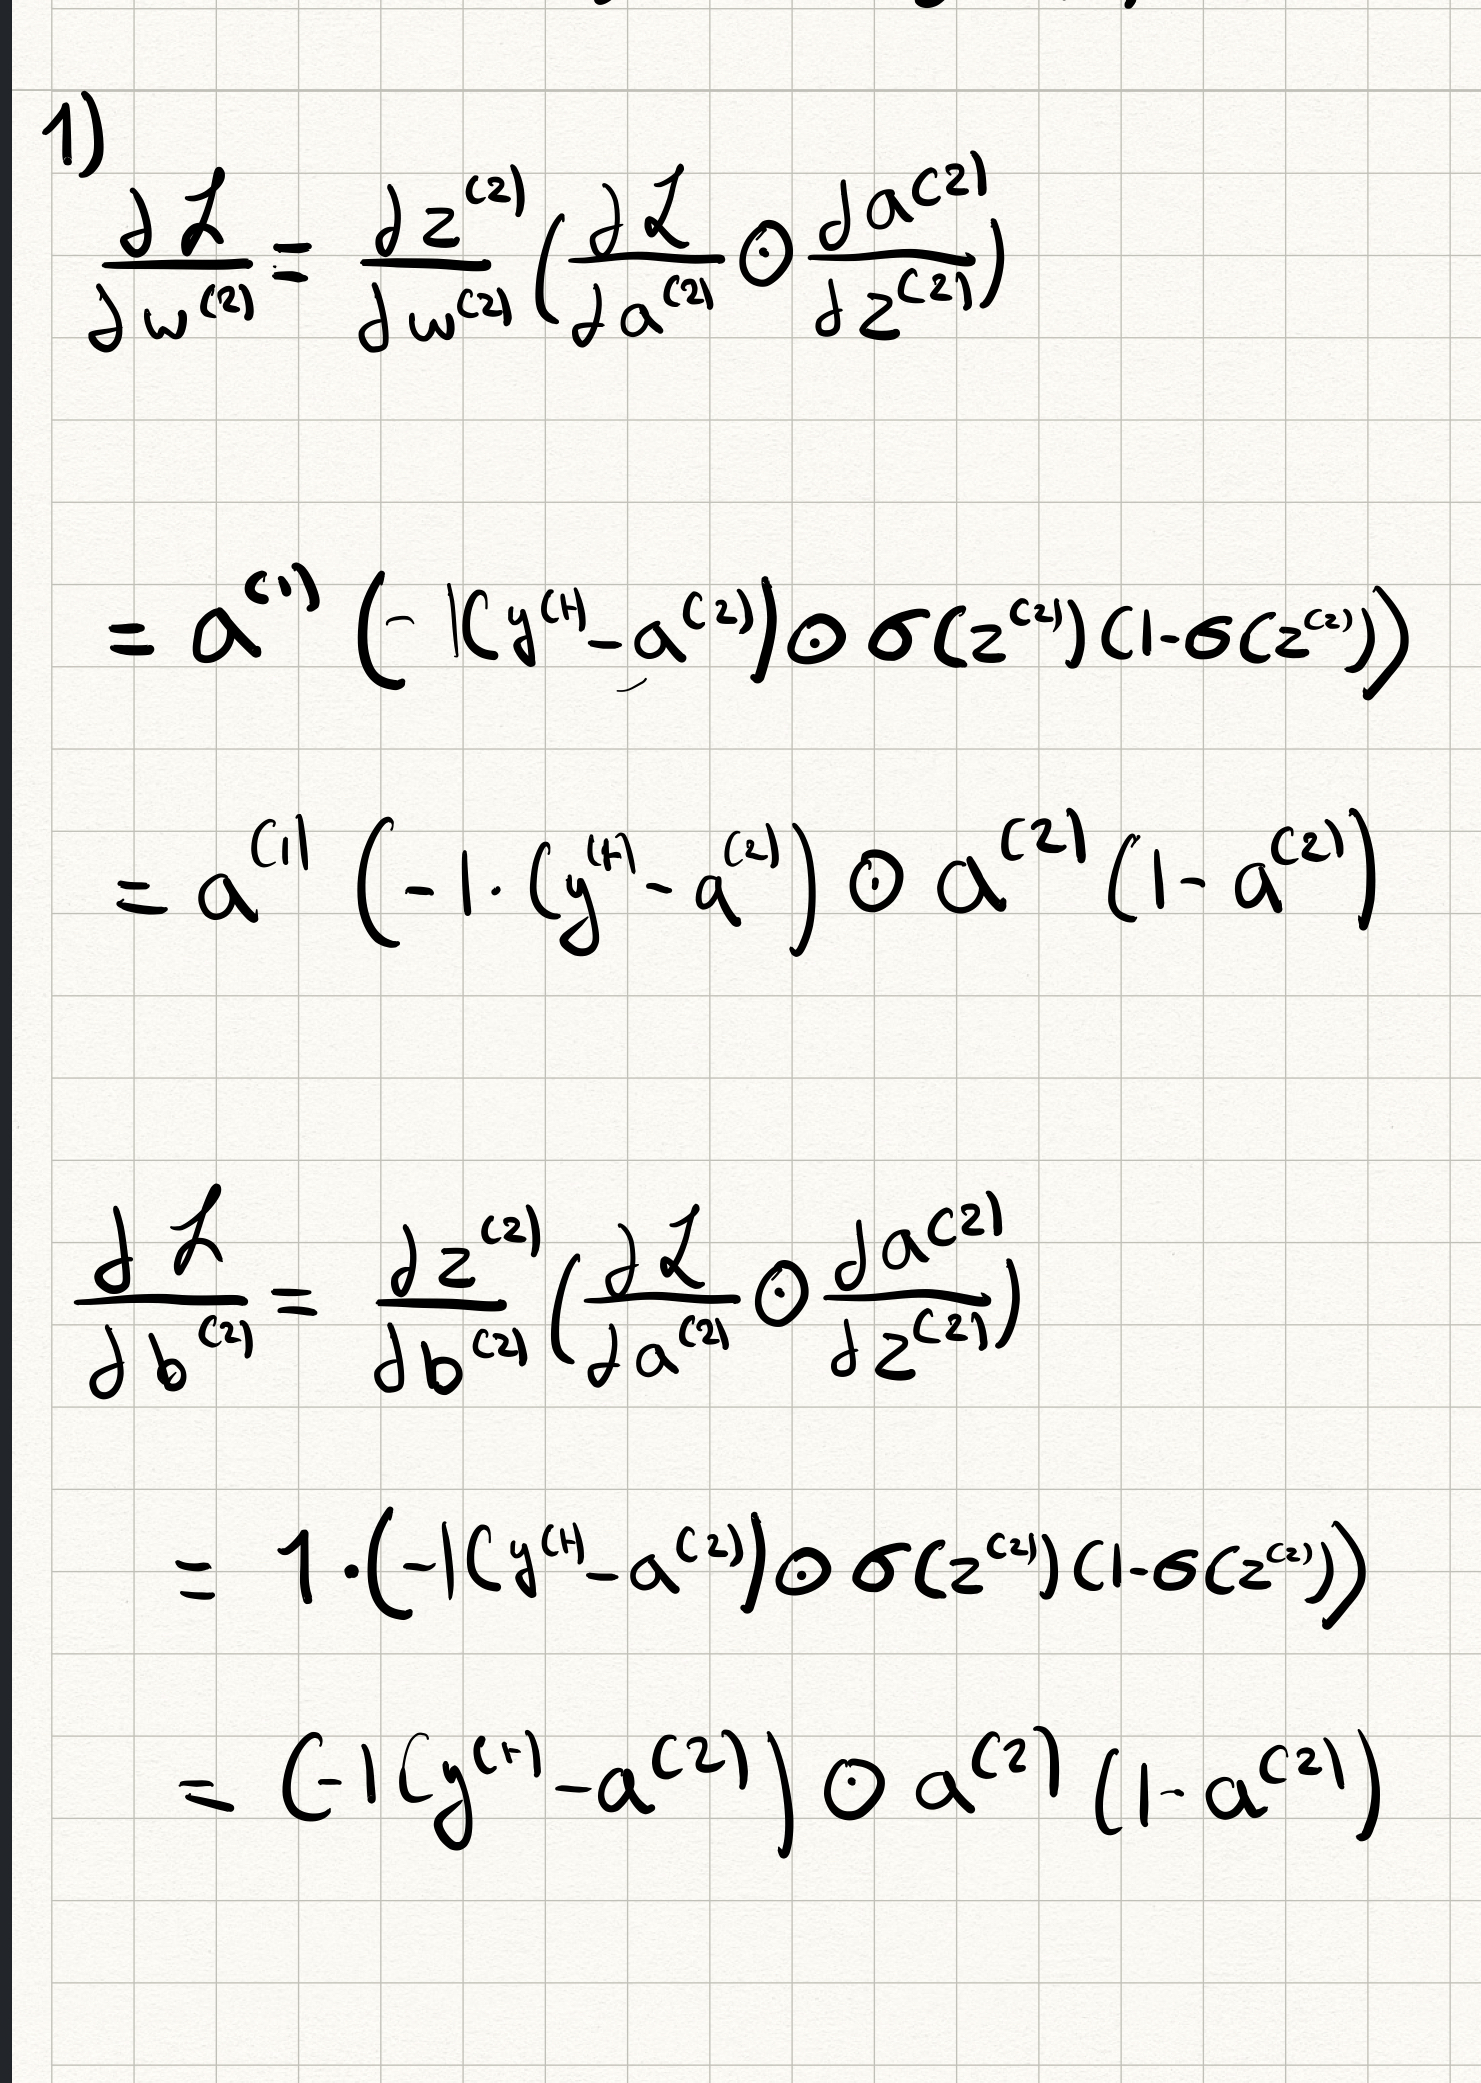

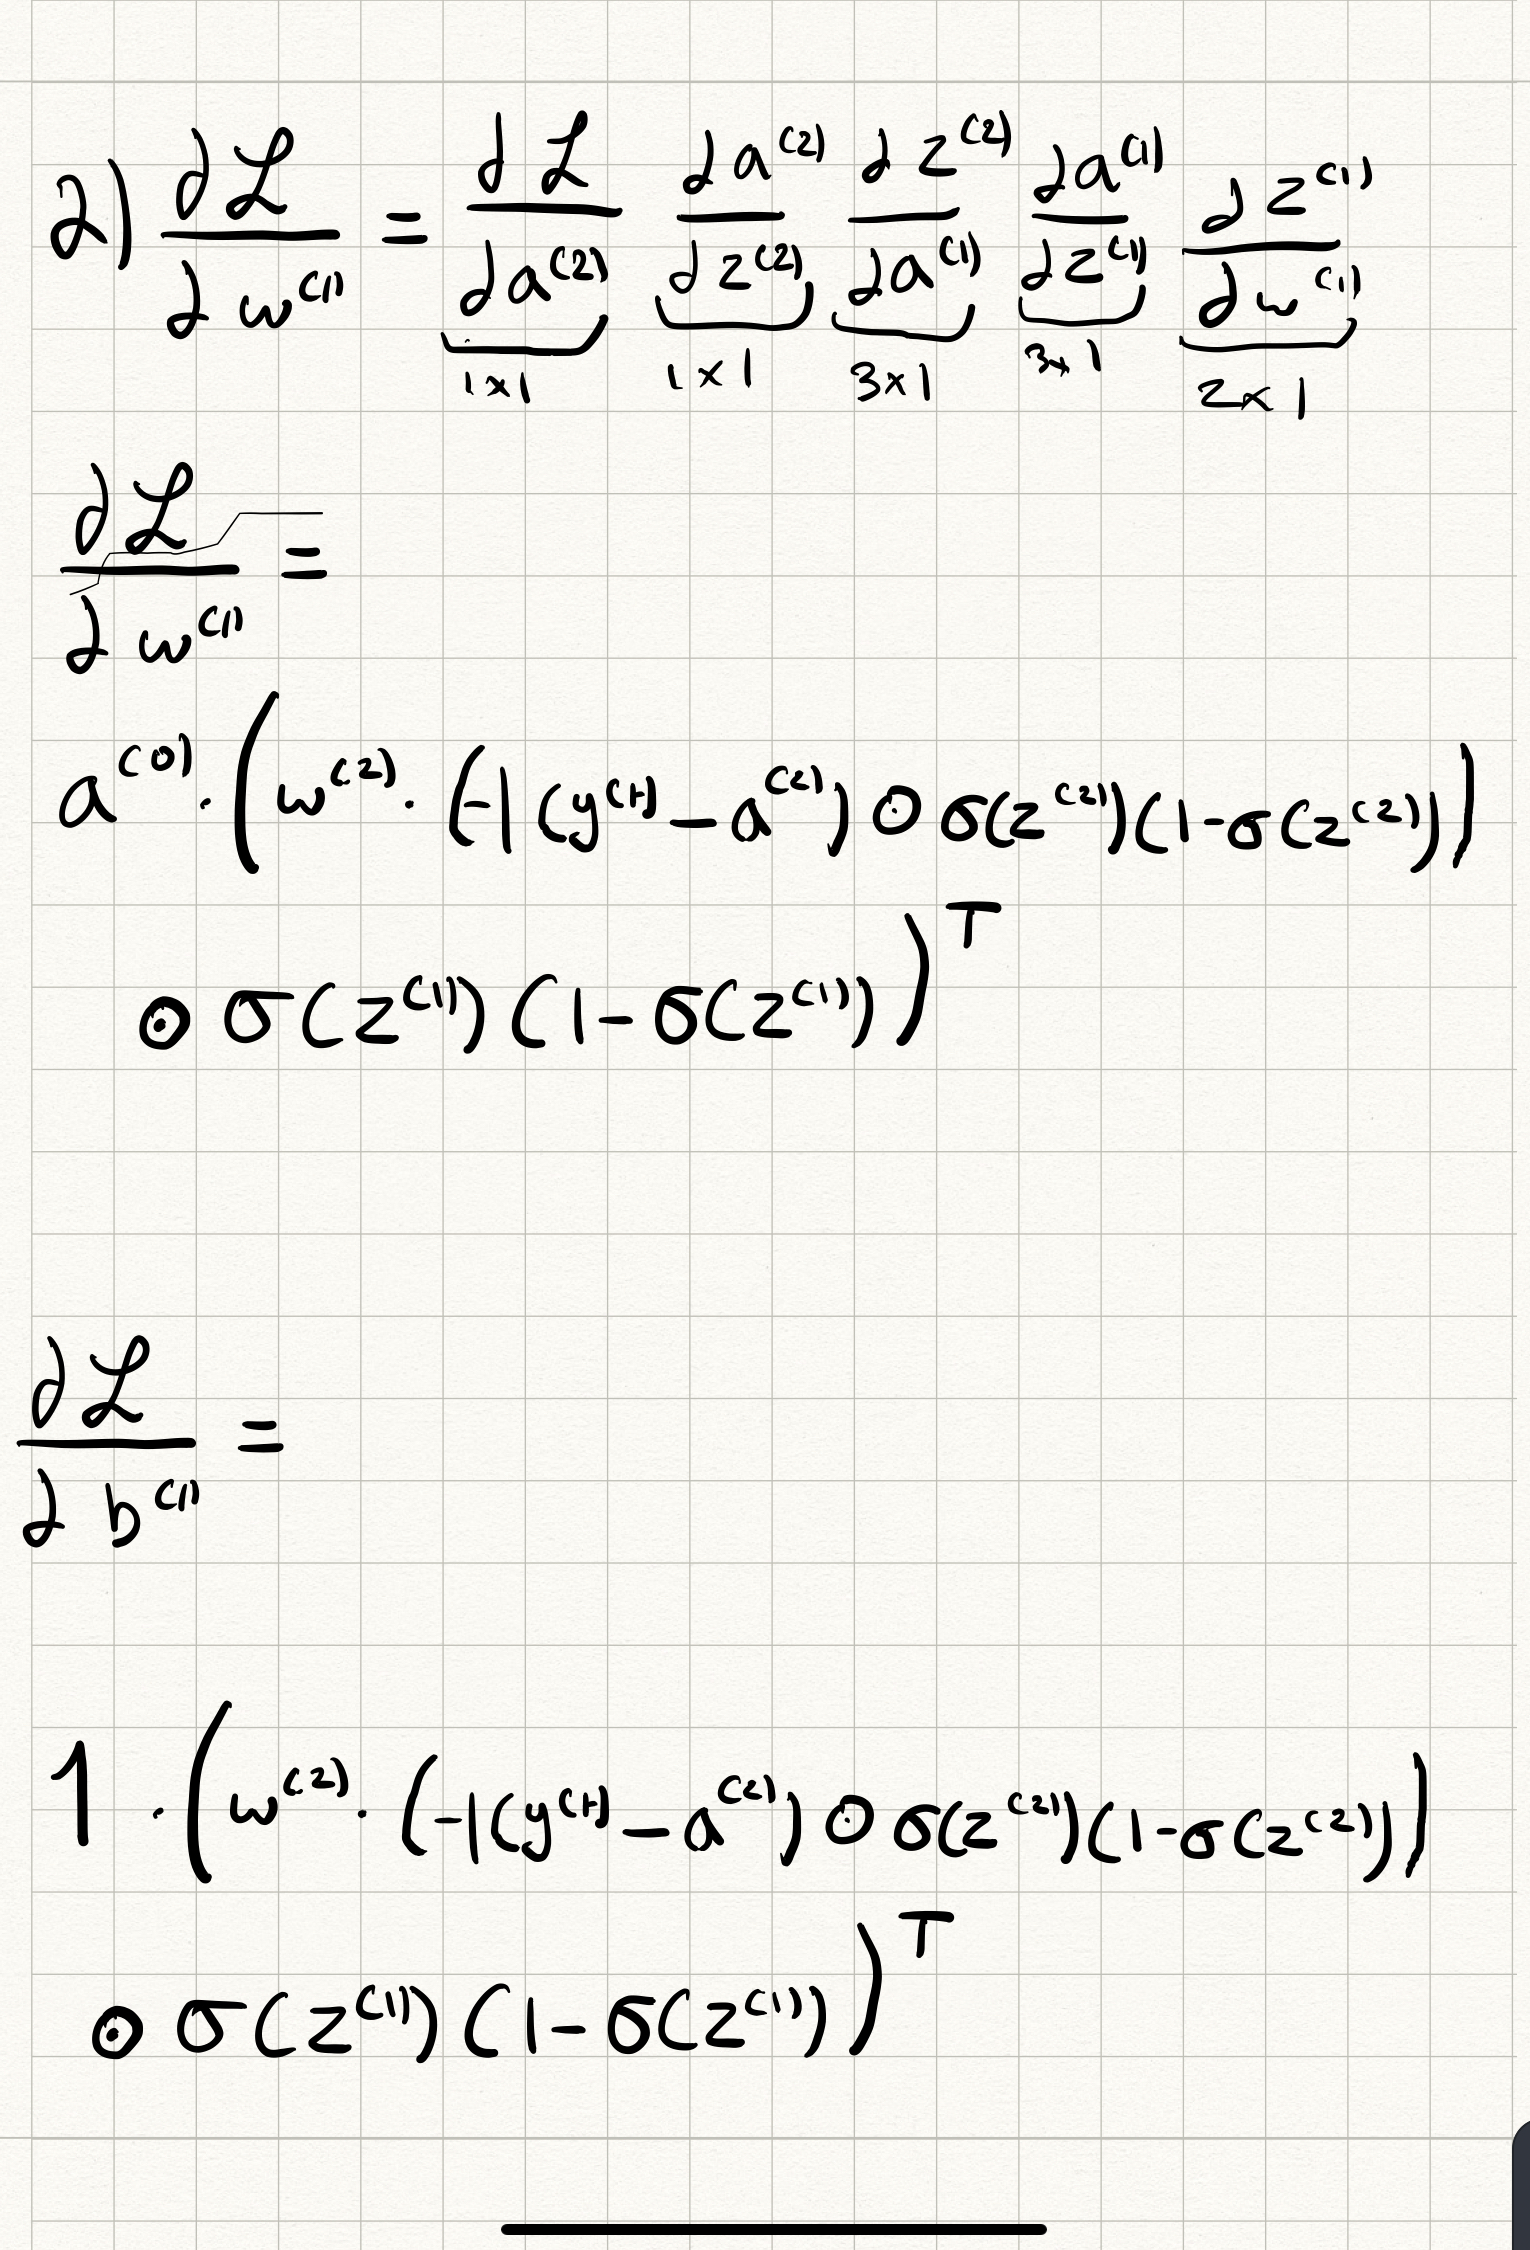

In [515]:
from IPython.display import Image
from PIL import Image

p1 = Image.open('1.jpeg')
display(p1)

p2 = Image.open('2.jpeg')
display(p2)


## Q2: Implementation

In this part, you need to construct a neural network model (almost) from scratch, run experiments, and write reports. We provide a script of skeleton code as well as three datasets.

Your tasks are the following.
1. Build your network model following the instruction.
2. Run experiments and produce results.
3. Interpret and discuss your results.

### Q2.1: Import Packages

The packages that have been imported in the following block should be sufficient for this assignment, but you are free to add more if necessary. However, keep in mind that you **should not** import and use any neural network package. If you have concern about an addition package, please contact us via Piazza.

In [516]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas

### Q2.2: Define Activation and Loss Functions

Complete the following functions. The ones starting with a "d" are the derivatives of the corresponding functions.

Definitions:
1. sigmoid: $\sigma(x) = \frac{1}{1 + e^{-x}}$
2. softmax: softmax(x) $= \frac{e^{x_{i}}}{\sum_{i} e^{x_{i}}}$
3. L2 loss: $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$
4. cross entropy loss: $L(y_{\text{true}}, y_{\text{predict}}) = -\sum_{i}y_{\text{true}}[i]\cdot\log y_{\text{predict}}[i]$

In [517]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def l2_loss(YTrue, YPredict):
    return .5 * ((YTrue - YPredict) ** 2)

def d_l2_loss(YTrue, YPredict):
    derivative = YPredict - YTrue
    return derivative

def cross_entropy_loss(YTrue, YPredict):
    YTrue = YTrue.reshape((-1, 1))
    error_sum = 0
    for i in range(len(YPredict)):
        error_sum += (-1 * YTrue[i]* np.log(YPredict[i]))
    return error_sum

def d_cross_entropy_softmax(YTrue, YPredict):
    YTrue = YTrue.reshape((-1,1))
    derivative = YPredict - YTrue
    return derivative

### Q2.3: Define the Layer Class

Complete the `initialize_weights` function, which initializes the weights and biases with small random values. The `__init__` function should be left as it is.

*Hint*: It is recommended that you define weights and bias separately for clarity.

In [518]:
class Layer:
    def __init__(self, n_input, n_output, bias = True):
        self.n_input = n_input
        self.n_output = n_output
        self.bias = bias
        self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases with small random values.
        """
        rng = np.random.default_rng(2) # for re-producibility, do not change this
        ########################## start of your code ##########################
        self.weights = rng.standard_normal((self.n_input, self.n_output))
        
        self.bias = rng.standard_normal((1, self.n_output))
        ########################## end of your code ############################


### Q2.4: Define the Network Class

Complete the `fit` and `predict` functions as instructed in the comments. Do not change their input arguments, but you are free to add functions as necessary. The `__init__` function should be left as it is.

*Hint \#1*: This is the heaviest part of this assignment. We recommend you to first go over the math carefully before starting this part.

*Hint \#2*: You are strongly encouraged to use numpy for matrix operations. When doing multiplication, please be careful about the dimensions, as well as the difference between the "\*" operator, numpy's `multiply` function, and numpy's `dot` function.

In [519]:
class Network:
    def __init__(self, layers, activation_list, d_activation_list, loss_function, d_loss_function):
        self.layers = layers
        self.activation_list = activation_list
        self.d_activation_list = d_activation_list
        self.loss_function = loss_function
        self.d_loss_function = d_loss_function

    def fit(self, X, Y, learning_rate, reg_lambda):
        """
        This is the training function. It should return the average loss over samples.
        """
        loss, n_sample = 0, len(X)
        
        ########################## start of your code ##########################
        # first, initialize zero gradients - done
        for layer in self.layers: #zero out our accumulator matrices
            layer.delta_weights = np.zeros((layer.n_input, layer.n_output))
            layer.delta_bias = np.zeros((1, layer.n_output))
            layer.eta = np.zeros((layer.n_output, 1))
            layer.a = np.zeros((layer.n_output, 1))
            layer.z = np.zeros((layer.n_output, 1))
            
        for i in range(n_sample): 
            sample_input = X[i].reshape((-1,1))
            y_predicted = self.forward_function(sample_input)
            sample_loss = self.loss_function(Y[i], y_predicted)
            loss += sample_loss
            sample_loss_d = self.d_loss_function(Y[i], y_predicted)
            self.back_propagate(sample_input, sample_loss_d)
    
        for layer in self.layers:
            layer.delta_weights /= n_sample
            layer.delta_bias /= n_sample 
            layer.weights -= (learning_rate * (layer.delta_weights + (reg_lambda * layer.weights)))
            layer.bias -= (learning_rate * layer.delta_bias )
            

        # next, for each sample,
        # 1. compute outputs from each layer (via some forward function); - done
        # 2. compute and accumulate the loss (via the self.loss_function); - done 
        # 3. compute and accumulate the gradients (via some backprog function) - done 
        
        # then, update weights and biases using the corresponding gradients
        # don't forget to take the mean before updating

        ########################## end of your code ############################

        # lastly, return the average loss
        return loss / n_sample
    
    def forward_function(self, sample_input):
        sample_input = sample_input.reshape((-1, 1))
        a_prev = sample_input
        i = 0
        for layer in self.layers:
            layer.z = layer.weights.T @ a_prev + layer.bias.T
            layer.a = self.activation_list[i](layer.z)
            a_prev = layer.a
            i+=1
        
        return self.layers[-1].a 

            
    def back_propagate(self, sample_input, sample_loss_d):
        last_layer = self.layers[-1]
        if (last_layer.a.shape[0] > 1):
            last_layer.eta = sample_loss_d #we are using cross_entropy softmax loss which find eta_last 
        else:
            last_layer.eta = sample_loss_d * self.d_activation_list[-1](last_layer.z) #wheras other functions we need L' and a'
        for i in range(len(self.layers)-2, -1, -1):
            self.layers[i+1].delta_weights += self.layers[i].a @ self.layers[i+1].eta.T
            self.layers[i+1].delta_bias += self.layers[i+1].eta.T
            self.layers[i].eta = self.layers[i + 1].weights @ self.layers[i+1].eta * self.d_activation_list[i](self.layers[i].z)
        #update weight accumulators for layer 0 (1st activation layer)
        self.layers[0].delta_weights += sample_input @ self.layers[0].eta.T
        self.layers[0].delta_bias += self.layers[0].eta.T
    

    def predict(self, X, threshold = None):
        """
        This function predicts the labels for samples in X. The parameter threshold
        is used when the labels are binary and there is only one node in the final
        layer of the network.
        """
        
        ######################### start of your code ###########################
        # for each sample, run a forward pass and append the predicted label to YPredict
        if threshold is None:
            YPredict = np.empty((len(X), 10))

            for i in range(len(X)):
                out_pred = self.forward_function(X[i])
                max_index = np.argmax(out_pred)
                one_hot_encoded = np.zeros_like(out_pred)
                one_hot_encoded[max_index] = 1
                one_hot_encoded = one_hot_encoded.reshape(1,10)
                YPredict[i] = one_hot_encoded
            return YPredict
        else:
            YPredict = []
            for i in range(len(X)):
                out_pred = self.forward_function(X[i].reshape(-1, 1))
                binary_predictions = (out_pred >= threshold).astype(int)
                YPredict.append(binary_predictions)
        ######################### end of your code #############################

        # return as a numpy array
        return np.array(YPredict).reshape(-1)


### Q2.5: Test Model

Use the following example code to test your model with some simple data.

**Make sure to produce a decreasing loss curve here before moving on.**

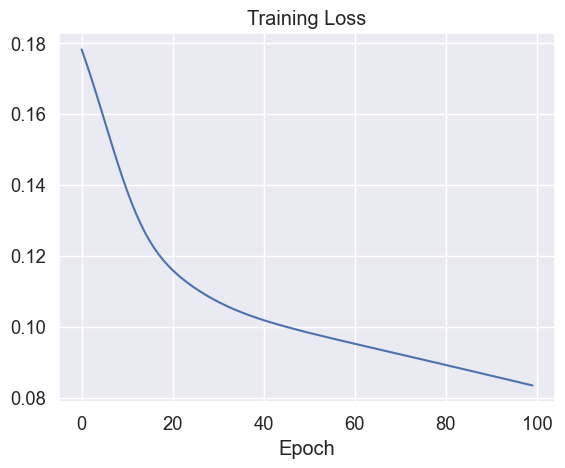

In [520]:
from sklearn import datasets

X, Y = datasets.load_iris(return_X_y = True)
X, Y = X[:100, :2], Y[:100]
rng = np.random.default_rng(2)
indices = [i for i in range(100)]
rng.shuffle(indices)
X, Y = X[indices], Y[indices]


# assemble your model
layers = [Layer(2, 4), Layer(4, 1)]
model = Network(layers, [sigmoid, sigmoid], [d_sigmoid, d_sigmoid], l2_loss, d_l2_loss)

# specify training parameters
epochs = 100
learning_rate = .5
reg_lambda = 0

# capture the loss values during training
loss = np.zeros(epochs)

# start training
for epoch in range(epochs):
    loss[epoch] = model.fit(X, Y, learning_rate, reg_lambda)

# plot the losses, the curve should be decreasing
plt.plot([i for i in range(epochs)], loss)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.show()


## Q3: Real Data Experiments with Dataset 1

In this section, you will implement experiments with dataset1. There are two subsets in this dataset: linearly and nonlinearly.

For each subset, your tasks are the following:
1. Split it using [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) with K = 5. Make sure the splitting is **random** (preferrably seeded).
2. For each split, perform training and test with an instance of your model.
3. Compute the **confusion matrix**. The values should be ***accumulated*** across all folds.
4. Compute the **performance results**: accuracy, precision, recall, and F1. The values should the ***average*** across all folds.

Please show the results clearly (one item at a time).

In [521]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def train(model, X, Y, learning_rate, reg_lambda, epochs=len(X)):
    for i in range(epochs):
        model.fit(X, Y, learning_rate, reg_lambda)

def test(model, X_test, threshold = None):
    return model.predict(X_test, threshold)


def print_metrics(acc_accumulator, rec_accumulator, f1_accumulator, prec_accumulator, n_splits):
    print("avg accuracy:", acc_accumulator/n_splits)
    print("avg recall:", rec_accumulator/n_splits)
    print("avg precision:", prec_accumulator/n_splits)
    print("avg f1:", f1_accumulator/n_splits)



### Q3.1: LinearXY


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


avg accuracy: 0.6799999999999999
avg recall: 0.36
avg precision: 0.6
avg f1: 0.4444444444444445


<Figure size 600x600 with 0 Axes>

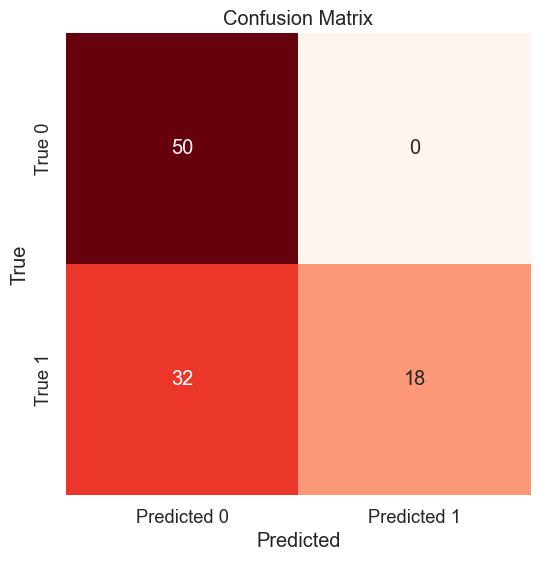

In [522]:
# write your code in this block
X_lin = pd.read_csv('Data/dataset1/LinearX.csv')
Y_lin = pd.read_csv('Data/dataset1/LinearY.csv')
n_splits = 5
skf = StratifiedKFold(n_splits, shuffle=True, random_state=2)

layers = [Layer(2, 4), Layer(4, 1)]
model = Network(layers, [sigmoid, sigmoid], [d_sigmoid, d_sigmoid], l2_loss, d_l2_loss)

pred_accumulator = []
test_accumulator = []
acc_accumulator = rec_accumulator = f1_accumulator = prec_accumulator= 0

for train_index, test_index in skf.split(X, Y):
    X_train, Y_train, X_test, Y_test = X[train_index], Y[train_index], X[test_index], Y[test_index]
    train(model, X_train, Y_train, learning_rate, reg_lambda, 100)
    Y_pred = test(model, X_test, .77)
    pred_accumulator.extend(Y_pred)
    test_accumulator.extend(Y_test)
    acc_accumulator += accuracy_score(Y_test, Y_pred)
    rec_accumulator += recall_score(Y_test, Y_pred)
    prec_accumulator += precision_score(Y_test, Y_pred)
    f1_accumulator += f1_score(Y_test, Y_pred)

print_metrics(acc_accumulator, rec_accumulator, f1_accumulator, prec_accumulator, n_splits)
  
cm = confusion_matrix(test_accumulator, pred_accumulator)
plt.figure(figsize=(6, 6))
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Q3.2: NonLinearXY


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


avg accuracy: 0.67
avg recall: 0.34
avg precision: 0.6
avg f1: 0.4253968253968254


<Figure size 600x600 with 0 Axes>

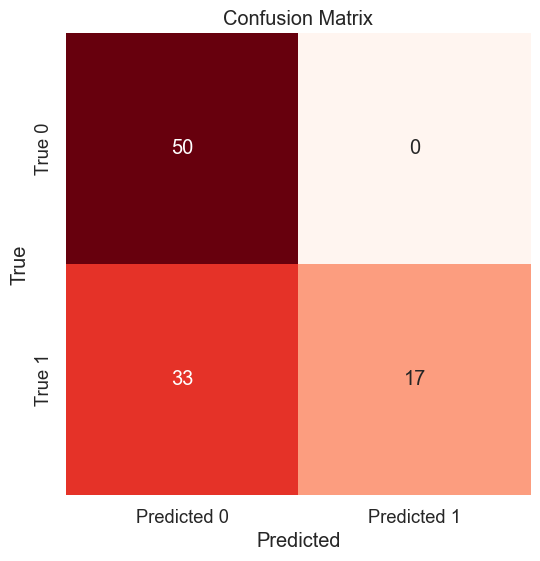

In [523]:
X_non_l = pd.read_csv('Data/dataset1/NonlinearX.csv')
Y_non_l = pd.read_csv('Data/dataset1/NonlinearY.csv')
n_splits = 5
skf = StratifiedKFold(n_splits, shuffle=True, random_state=2)

layers = [Layer(2, 4), Layer(4, 1)]
model = Network(layers, [sigmoid, sigmoid], [
                d_sigmoid, d_sigmoid], l2_loss, d_l2_loss)

pred_accumulator = []
test_accumulator = []
acc_accumulator = rec_accumulator = f1_accumulator = prec_accumulator = 0

for train_index, test_index in skf.split(X, Y):
    X_train, Y_train, X_test, Y_test = X[train_index], Y[train_index], X[test_index], Y[test_index]
    train(model, X_train, Y_train, learning_rate, reg_lambda, 100)
    Y_pred = test(model, X_test, .78)
    pred_accumulator.extend(Y_pred)
    test_accumulator.extend(Y_test)
    acc_accumulator += accuracy_score(Y_test, Y_pred)
    rec_accumulator += recall_score(Y_test, Y_pred)
    prec_accumulator += precision_score(Y_test, Y_pred)
    f1_accumulator += f1_score(Y_test, Y_pred)

print_metrics(acc_accumulator, rec_accumulator,
              f1_accumulator, prec_accumulator, n_splits)

cm = confusion_matrix(test_accumulator, pred_accumulator)
plt.figure(figsize=(6, 6))
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Q4: Real Data Experiments with Dataset 2

Dataset2 has been split into training and test subsets, so you only need to load them accordingly.

In this part, you need to try out different model parameter values and observe how they affect the results.

For each of the questions below, show **performance results** as four lists. An eample output is the following:

`accuracy scores: [1., 1., 1., 1.]`

`precision scores: [1., 1., 1., 1.]`

`recall scores: [1., 1., 1., 1.]`

`f1 scores: [1., 1., 1., 1.]`

Use the following function to obtain one-hot encoded labels. Note that the returned labels are by default **row vectors**.

In [524]:
from sklearn.preprocessing import OneHotEncoder


# Simply pass the labels as two 1D arrays.
def one_hot_encode(YTrain, YTest):
    encoder = OneHotEncoder(sparse_output = False)
    return encoder.fit_transform(YTrain.reshape(-1, 1)), encoder.transform(YTest.reshape(-1, 1))


### Q4.1: Epochs

Experiment with at least **5** different choices of total epochs.

In [525]:
# write your code in this block




Y_test = pd.read_csv('Data/dataset2/Digit_y_test.csv').values
Y_train = pd.read_csv('Data/dataset2/Digit_y_train.csv').values


X_test = pd.read_csv('Data/dataset2/Digit_X_test.csv').values
X_train = pd.read_csv('Data/dataset2/Digit_X_train.csv').values
Y_train_enc, Y_test_enc = one_hot_encode(Y_train, Y_test)

acc_list = []
prec_list = []
rec_list = []
f1_list = []


def print_results():
   print("accuracy scores:", acc_list)
   print("precision scores:", prec_list)
   print("recall scores:", rec_list)
   print("f1 scores:", f1_list)

for epochs in [50, 100, 200, 500, 1000]:
    layers = [Layer(64, 20), Layer(20, 16), Layer(16, 10)]
    model = Network(layers, [sigmoid, sigmoid, softmax], [
                   d_sigmoid, d_sigmoid], cross_entropy_loss, d_cross_entropy_softmax)
    train(model, X_train, Y_train_enc, learning_rate, reg_lambda, epochs)
    y_pred = model.predict(X_test)
    predicted_binary = y_pred.argmax(axis=1)
    true_binary = Y_test_enc.argmax(axis=1)
    acc_list.append(accuracy_score(true_binary, predicted_binary))
    rec_list.append(recall_score(
       true_binary, predicted_binary, average='weighted'))
    prec_list.append(precision_score(
       true_binary, predicted_binary, average='weighted'))
    f1_list.append(f1_score(true_binary, predicted_binary, average='weighted'))
   
   
print_results()


KeyboardInterrupt: 

### Q4.2: Learning Rate

Experiment with at least **5** different choices of learning rates.

In [ ]:
# write your code in this block
acc_list = []
prec_list = []
rec_list = []
f1_list = []

for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
    layers = [Layer(64, 20), Layer(20, 16), Layer(16, 10)]
    model = Network(layers, [sigmoid, sigmoid, softmax], [
        d_sigmoid, d_sigmoid], cross_entropy_loss, d_cross_entropy_softmax)
    train(model, X_train, Y_train_enc, learning_rate, reg_lambda, 200)
    y_pred = model.predict(X_test)
    predicted_binary = y_pred.argmax(axis=1)
    true_binary = Y_test_enc.argmax(axis=1)
    acc_list.append(accuracy_score(true_binary, predicted_binary))
    rec_list.append(recall_score(
        true_binary, predicted_binary, average='weighted'))
    prec_list.append(precision_score(
        true_binary, predicted_binary, average='weighted'))
    f1_list.append(f1_score(true_binary, predicted_binary, average='weighted'))


print_results()


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy scores: [0.8719376391982183, 0.5033407572383074, 0.15033407572383073, 0.11247216035634744, 0.11469933184855234]
precision scores: [0.8739051155646133, 0.4818260194743793, 0.13984152757564985, 0.05622755559475856, 0.059533673020529754]
recall scores: [0.8719376391982183, 0.5033407572383074, 0.15033407572383073, 0.11247216035634744, 0.11469933184855234]
f1 scores: [0.8715740394206617, 0.47688212590980555, 0.11926706797243705, 0.06370621211596866, 0.06119104534742988]


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q4.3: Regularization Parameter

Experiment with at least **3** different choices of regularization parameter.

In [ ]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []

for reg_param in [0.01, 0.1, 1.0]:
    layers = [Layer(64, 20), Layer(20, 16), Layer(16, 10)]
    model = Network(layers, [sigmoid, sigmoid, softmax], [
        d_sigmoid, d_sigmoid], cross_entropy_loss, d_cross_entropy_softmax)
    train(model, X_train, Y_train_enc, .01, reg_param, 200)
    y_pred = model.predict(X_test)
    predicted_binary = y_pred.argmax(axis=1)
    true_binary = Y_test_enc.argmax(axis=1)
    acc_list.append(accuracy_score(true_binary, predicted_binary))
    rec_list.append(recall_score(
        true_binary, predicted_binary, average='weighted'))
    prec_list.append(precision_score(
        true_binary, predicted_binary, average='weighted'))
    f1_list.append(f1_score(true_binary, predicted_binary, average='weighted'))


print_results()


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy scores: [0.1492204899777283, 0.16926503340757237, 0.09910913140311804]
precision scores: [0.13910242674587683, 0.14901986829381267, 0.009822619927480517]
recall scores: [0.1492204899777283, 0.16926503340757237, 0.09910913140311804]
f1 scores: [0.11842211535711315, 0.1397789115271723, 0.01787378458941744]


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q4.4: Network Structure

Experiment with at least **5** different choices of network structure. This includes number of layers and number of nodes in each layer.

*Hint*: Try experimenting with increasing complexity.

In [ ]:
# write your code in this block
layers1 = [Layer(64, 20), Layer(20, 16), Layer(16, 10)]
layers2 = [Layer(64, 80), Layer(80, 40), Layer(40, 20), Layer(20, 10)]
layers3 = [Layer(64, 100), Layer(100, 80), Layer(80, 40), Layer(40, 16), Layer(16, 10)]
layers4 = [Layer(64, 150), Layer(150, 80), Layer(80, 16), Layer(16, 10)]
layers5 = [Layer(64, 80), Layer(80, 120), Layer(120, 180), Layer(180, 10)]


layers = [layers1, layers2, layers3, layers4, layers5]

activ1 = [sigmoid, sigmoid, softmax]
activ2 = [sigmoid, sigmoid, sigmoid, softmax]
activ3 = [sigmoid, sigmoid, sigmoid, sigmoid, softmax]
activ4 = [sigmoid, sigmoid, sigmoid, softmax]
activ5 = [sigmoid, sigmoid, sigmoid, softmax]

activations = [activ1, activ2, activ3, activ4, activ5]

deriv1 = [d_sigmoid, d_sigmoid]
deriv2 = [d_sigmoid, d_sigmoid, d_sigmoid]
deriv3 = [d_sigmoid, d_sigmoid, d_sigmoid, d_sigmoid]
deriv4 = [d_sigmoid, d_sigmoid, d_sigmoid]
deriv5 = [d_sigmoid, d_sigmoid, d_sigmoid]

derivatives = [deriv1, deriv2, deriv3, deriv4, deriv5]

acc_list = []
prec_list = []
rec_list = []
f1_list = []

for i in range(len(layers)):
    model = Network(layers[i], activations[i], derivatives[i],
                    cross_entropy_loss, d_cross_entropy_softmax)
    train(model, X_train, Y_train_enc, .01, 0, 200)
    y_pred = model.predict(X_test)
    predicted_binary = y_pred.argmax(axis=1)
    true_binary = Y_test_enc.argmax(axis=1)
    acc_list.append(accuracy_score(true_binary, predicted_binary))
    rec_list.append(recall_score(
        true_binary, predicted_binary, average='weighted'))
    prec_list.append(precision_score(
        true_binary, predicted_binary, average='weighted'))
    f1_list.append(f1_score(true_binary, predicted_binary, average='weighted'))


print_results()


/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdelazimlokma/anaconda3/lib/pyth

accuracy scores: [0.15033407572383073, 0.0645879732739421, 0.16592427616926503, 0.17037861915367483, 0.44988864142538976]
precision scores: [0.13984152757564985, 0.04062580932243622, 0.14158232508019503, 0.13757933771012376, 0.43433564975397804]
recall scores: [0.15033407572383073, 0.0645879732739421, 0.16592427616926503, 0.17037861915367483, 0.44988864142538976]
f1 scores: [0.11926706797243705, 0.04593145724274885, 0.145651053810204, 0.14383148740557905, 0.4379835674451926]


## Q5: Follow-up Questions

For each question below, provide a short answer. You can cite your code if needed.

### Q5.1: Briefly describe the workflow of how your model classifies the data.

**[Answer]**

The model classifies the data by taking as input a vector of features, which it then passes through a network of nodes that
attempt to appoximate a function, that is capable of classifying a sample (the input) into a specific class. The final layer of our Neural network uses the sofmax activation function, allows each node in that final layer to output a probability of the sample input belonging to a specific class. 


### Q5.2: In your own words, explain how the forward propagation in your model works.

**[Answer]**

In the forward pass through our NN, we go through all samples in our training data, running them forward through the network to get a predicted output (Q2.4 lines 52-62 forward_function). This is done by passing the input through the layers of our NN, each layer takes the output of the prevous layer, and each node within that layer computes a weighted sum, then passes that weighted sum through an activation function that adjusts the range of the calculation between 0-1 (sigmoid and softmax), where sigmoid allows for overlap (non mutually exclusive values), and softmax does not (all outputs add up to 1). Once the predicted ouput is computed (as described above in the classification description), we then calculate the loss using our cross entropy loss function, which only considers the probability assigned to the correct classification.

### Q5.3: In your own words, explain how the backward propagation in your model works.

**[Answer]**

Using backprop, we find the gradients of each weight and bias for each sample passed forward through the network. If we consider our neural network as one big composite function, to find the gradients of these weights and biases (these variables nested within different levels of our composite function), we have to take the chain partial derivatives that allows us to access them. After we find these gradients, we sum them up for each weight and bias and divide by the number of samples to find the average. We then move against the average gradients of each weight and bias by a certain step size (determined by the learning rate), in order to find some (hopefully optimal) minima in the loss function.

### Q5.4: In theory, how do the total number of epochs, the learning rate, and the regularization parameter impact the performance of model? Does any of the theoretical impact actually happen in your result? If so, point them out.

**[Answer]**

The total number of epochs allows the NN more iterations to adjust its weights and biases, since my NN has a optimization rate, a higher number of epochs results better performance overall as seen in Q4.1.

An increased learning rate would improve the performance of my model as seen in Q4.2, my model grealtly benefits from the increase, but increasing it beyond a certain value may result in 'overshooting' the optimal loss. 

Since my model already underfits due to its slow learning rate, a regularization parameter does nothing but slow its progress down even more as seen in Q4.3.


